## Crypto Arbitrage

In this Challenge, you'll take on the role of an analyst at a high-tech investment firm. The vice president (VP) of your department is considering arbitrage opportunities in Bitcoin and other cryptocurrencies. As Bitcoin trades on markets across the globe, can you capitalize on simultaneous price dislocations in those markets by using the powers of Pandas?

For this assignment, you’ll sort through historical trade data for Bitcoin on two exchanges: Bitstamp and Coinbase. Your task is to apply the three phases of financial analysis to determine if any arbitrage opportunities exist for Bitcoin.

This aspect of the Challenge will consist of 3 phases.

1. Collect the data.

2. Prepare the data.

3. Analyze the data. 



###  Import the required libraries and dependencies.

In [114]:
import pandas as pd
from pathlib import Path
%matplotlib inline

## Collect the Data

To collect the data that you’ll need, complete the following steps:

Instructions. 

1. Using the Pandas `read_csv` function and the `Path` module, import the data from `bitstamp.csv` file, and create a DataFrame called `bitstamp`. Set the DatetimeIndex as the Timestamp column, and be sure to parse and format the dates.

2. Use the `head` (and/or the `tail`) function to confirm that Pandas properly imported the data.

3. Repeat Steps 1 and 2 for `coinbase.csv` file.

### Step 1: Using the Pandas `read_csv` function and the `Path` module, import the data from `bitstamp.csv` file, and create a DataFrame called `bitstamp`. Set the DatetimeIndex as the Timestamp column, and be sure to parse and format the dates.

In [115]:
# Read in the CSV file called "bitstamp.csv" using the Path module. 
# The CSV file is located in the Resources folder.
# Set the index to the column "Date"
# Set the parse_dates and infer_datetime_format parameters
bitstamp = pd.read_csv(Path('./Resources/bitstamp.csv'),
                      index_col='Timestamp',
                      parse_dates=True,
                      infer_datetime_format=True )


### Step 2: Use the `head` (and/or the `tail`) function to confirm that Pandas properly imported the data.

In [116]:
# Use the head (and/or tail) function to confirm that the data was imported properly.
# bitstamp head
bitstamp.head()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13681.04,13681.04,13637.93,$13646.48,3.334553,45482.128785,13639.647479
2018-01-01 00:01:00,13646.48,13658.75,13610.18,$13658.75,2.663188,36361.390888,13653.332816
2018-01-01 00:02:00,13616.93,13616.93,13610.06,$13610.22,0.084653,1152.144036,13610.136247
2018-01-01 00:03:00,13610.27,13639.09,13610.27,$13639.09,7.182986,97856.416478,13623.361128
2018-01-01 00:04:00,13635.35,13636.35,13620.00,$13620.0,1.069665,14582.660932,13632.923329


### Step 3: Repeat Steps 1 and 2 for `coinbase.csv` file.

In [117]:
# Read in the CSV file called "coinbase.csv" using the Path module. 
# The CSV file is located in the Resources folder.
# Set the index to the column "Timestamp"
# Set the parse_dates and infer_datetime_format parameters
coinbase = pd.read_csv(Path('./Resources/coinbase.csv'),
                       index_col='Timestamp',
                       parse_dates=True,
                       infer_datetime_format=True
                      )

In [118]:
# Use the head (and/or tail) function to confirm that the data was imported properly.
# coinbase head()
coinbase.head()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13620.00,13620.00,13608.49,$13608.49,20.812754,283451.08537,13619.105106
2018-01-01 00:01:00,13607.14,13607.14,13601.66,$13601.66,13.474359,183283.97801,13602.426919
2018-01-01 00:02:00,13601.44,13601.44,13580.00,$13580.0,11.536360,156789.19686,13590.872506
2018-01-01 00:03:00,13587.31,13587.31,13542.70,$13550.34,16.328039,221413.64182,13560.332806
2018-01-01 00:04:00,13550.34,13585.95,13550.34,$13583.44,9.955364,135141.26944,13574.719401


## Prepare the Data

To prepare and clean your data for analysis, complete the following steps:

1. For the bitstamp DataFrame, replace or drop all `NaN`, or missing, values in the DataFrame.

2. Use the `str.replace` function to remove the dollar signs ($) from the values in the Close column.

3. Convert the data type of the Close column to a `float`.

4. Review the data for duplicated values, and drop them if necessary.

5. Repeat Steps 1–4 for the coinbase DataFrame.

### Step 1: For the bitstamp DataFrame, replace or drop all `NaN`, or missing, values in the DataFrame.

In [119]:
# For the bitstamp DataFrame, replace or drop all NaNs or missing values in the DataFrame
# checking for missing data
bitstamp.isnull().sum()

# total rows 129540
print(len(bitstamp))

# there is missing data, let's just drop it
bitstamp_missing_removed_df = bitstamp.dropna()

# check that its dropped
bitstamp_missing_removed_df.isnull().sum()

# now has 129067 rows
print(len(bitstamp_missing_removed_df))

bitstamp_missing_removed_df.head()

129540
129067


,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13681.04,13681.04,13637.93,$13646.48,3.334553,45482.128785,13639.647479
2018-01-01 00:01:00,13646.48,13658.75,13610.18,$13658.75,2.663188,36361.390888,13653.332816
2018-01-01 00:02:00,13616.93,13616.93,13610.06,$13610.22,0.084653,1152.144036,13610.136247
2018-01-01 00:03:00,13610.27,13639.09,13610.27,$13639.09,7.182986,97856.416478,13623.361128
2018-01-01 00:04:00,13635.35,13636.35,13620.00,$13620.0,1.069665,14582.660932,13632.923329


### Step 2: Use the `str.replace` function to remove the dollar signs ($) from the values in the Close column.

In [120]:
# Use the str.replace function to remove the dollar sign, $
# YOUR CODE HERE
bitstamp_missing_removed_df.dtypes
# indeed, 'Close' column is not a float
bitstamp_dollars_removed_df = bitstamp_missing_removed_df.copy()

# remove the '$' from 'Close' column
bitstamp_dollars_removed_df['Close'] = bitstamp_missing_removed_df.loc[:,'Close'].str.replace('$', '')
bitstamp_dollars_removed_df.head()

/opt/anaconda3/envs/module_03/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13681.04,13681.04,13637.93,13646.48,3.334553,45482.128785,13639.647479
2018-01-01 00:01:00,13646.48,13658.75,13610.18,13658.75,2.663188,36361.390888,13653.332816
2018-01-01 00:02:00,13616.93,13616.93,13610.06,13610.22,0.084653,1152.144036,13610.136247
2018-01-01 00:03:00,13610.27,13639.09,13610.27,13639.09,7.182986,97856.416478,13623.361128
2018-01-01 00:04:00,13635.35,13636.35,13620.00,13620.0,1.069665,14582.660932,13632.923329


### Step 3: Convert the data type of the Close column to a `float`.

In [121]:
# Convert the Close data type to a float

# note that 'Close' is an object still
bitstamp_dollars_removed_df.dtypes

# changing 'Close' to float64
bitstamp_dollars_removed_df['Close'] = bitstamp_dollars_removed_df.loc[:,'Close'].astype('float')
# now a float
bitstamp_dollars_removed_df.dtypes


Open              float64
High              float64
Low               float64
Close             float64
BTC Volume        float64
USD Volume        float64
Weighted Price    float64
dtype: object

### Step 4: Review the data for duplicated values, and drop them if necessary.

In [122]:
# Review the data for duplicate values, and drop them if necessary

# any dupes?
bitstamp_dollars_removed_df.duplicated().sum()

# no dupes

0

### Step 5: Repeat Steps 1–4 for the coinbase DataFrame.

In [123]:
# Repeat Steps 1–4 for the coinbase DataFrame

# For the coinbase DataFrame, replace or drop all NaNs or missing values in the DataFrame
# checking for missing data
coinbase.isnull().sum()

# 218 rows are missing data

# total rows 129540
print(len(coinbase))

# there is missing data, let's just drop it
coinbase_missing_removed_df = coinbase.dropna()

# check that its dropped
coinbase_missing_removed_df.isnull().sum()

# now has rows 129322
print(len(coinbase_missing_removed_df))

coinbase_missing_removed_df.head()


# Use the str.replace function to remove the dollar sign, $
# YOUR CODE HERE
coinbase_missing_removed_df.dtypes

# indeed, 'Close' column is not a float
coinbase_dollars_removed_df = coinbase_missing_removed_df.copy()

# remove the '$' from 'Close' column
coinbase_dollars_removed_df['Close'] = coinbase_missing_removed_df.loc[:,'Close'].str.replace('$', '')
coinbase_dollars_removed_df.head()


# note that 'Close' is an object still
coinbase_dollars_removed_df.dtypes

# changing 'Close' to float64
coinbase_dollars_removed_df['Close'] = coinbase_dollars_removed_df.loc[:,'Close'].astype('float')

# now 'Close' is a float
coinbase_dollars_removed_df.dtypes



129540
129322


/opt/anaconda3/envs/module_03/lib/python3.7/site-packages/ipykernel_launcher.py:32: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.


Open              float64
High              float64
Low               float64
Close             float64
BTC Volume        float64
USD Volume        float64
Weighted Price    float64
dtype: object

## Analyze the Data

Your analysis consists of the following tasks: 

1. Choose the columns of data on which to focus your analysis.

2. Get the summary statistics and plot the data.

3. Focus your analysis on specific dates.

4. Calculate the arbitrage profits.

### Step 1: Choose columns of data on which to focus your analysis.

Select the data you want to analyze. Use `loc` or `iloc` to select the following columns of data for both the bitstamp and coinbase DataFrames:

* Timestamp (index)

* Close


In [124]:
# Use loc or iloc to select `Timestamp (the index)` and `Close` from bitstamp DataFrame

# cleaned data frames:
# bitstamp_dollars_removed_df
# coinbase_dollars_removed_df
bitstamp_sliced = bitstamp_dollars_removed_df.loc[:,['Close']]

# Review the first five rows of the DataFrame
bitstamp_sliced.head()

,Close
Timestamp,
2018-01-01 00:00:00,13646.48
2018-01-01 00:01:00,13658.75
2018-01-01 00:02:00,13610.22
2018-01-01 00:03:00,13639.09
2018-01-01 00:04:00,13620.00


In [125]:
# Use loc or iloc to select `Timestamp (the index)` and `Close` from coinbase DataFrame

# cleaned data frames:
# coinbase_dollars_removed_df
coinbase_sliced = coinbase_dollars_removed_df.loc[:, ['Close']]

# Review the first five rows of the DataFrame
coinbase_sliced.head()

,Close
Timestamp,
2018-01-01 00:00:00,13608.49
2018-01-01 00:01:00,13601.66
2018-01-01 00:02:00,13580.00
2018-01-01 00:03:00,13550.34
2018-01-01 00:04:00,13583.44


### Step 2: Get summary statistics and plot the data.

Sort through the time series data associated with the bitstamp and coinbase DataFrames to identify potential arbitrage opportunities. To do so, complete the following steps:

1. Generate the summary statistics for each DataFrame by using the `describe` function.

2. For each DataFrame, create a line plot for the full period of time in the dataset. Be sure to tailor the figure size, title, and color to each visualization.

3. In one plot, overlay the visualizations that you created in Step 2 for bitstamp and coinbase. Be sure to adjust the legend and title for this new visualization.

4. Using the `loc` and `plot` functions, plot the price action of the assets on each exchange for different dates and times. Your goal is to evaluate how the spread between the two exchanges changed across the time period that the datasets define. Did the degree of spread change as time progressed?

In [126]:
# Generate the summary statistics for the bitstamp DataFrame
# YOUR CODE HERE
bitstamp_sliced.describe()

,Close
count,129067.000000
mean,10459.842453
std,2315.976088
min,5944.000000
25%,8613.370000
50%,10145.950000
75%,11444.810000
max,17234.980000


In [127]:
# Generate the summary statistics for the coinbase DataFrame
# YOUR CODE HERE
coinbase_sliced.describe()

,Close
count,129322.000000
mean,10449.140958
std,2317.197419
min,5882.310000
25%,8609.230000
50%,10137.440000
75%,11397.237500
max,17177.990000


<AxesSubplot:title={'center':'Bitstamp Prices'}, xlabel='Timestamp'>

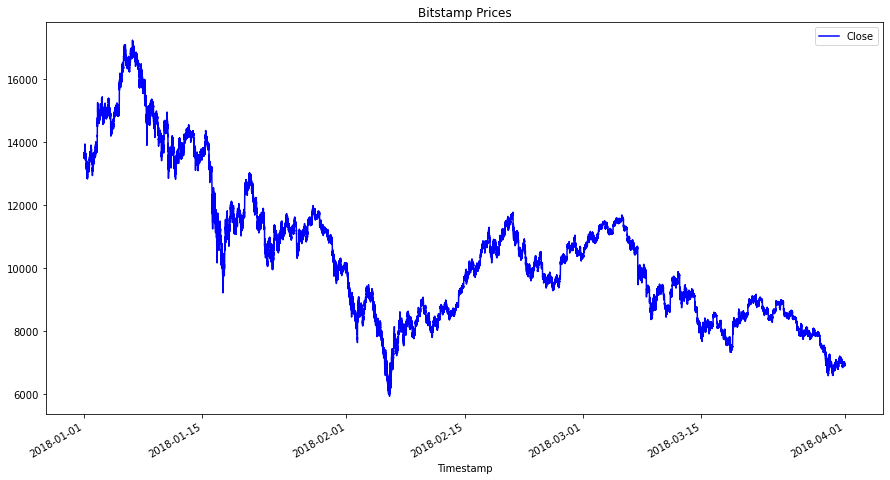

In [128]:
# Create a line plot for the bitstamp DataFrame for the full length of time in the dataset 
# Be sure that the figure size, title, and color are tailored to each visualization
# YOUR CODE HERE
bitstamp_sliced.plot(figsize=(15,8), title='Bitstamp Prices', color='blue')

<AxesSubplot:title={'center':'Coinbase Prices'}, xlabel='Timestamp'>

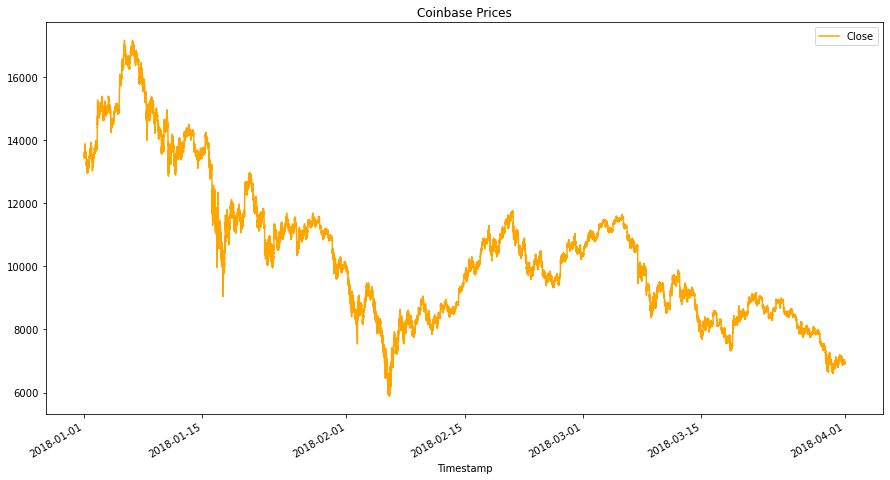

In [129]:
# Create a line plot for the coinbase DataFrame for the full length of time in the dataset 
# Be sure that the figure size, title, and color are tailored to each visualization
coinbase_sliced.plot(figsize=(15,8), title='Coinbase Prices', color='orange')

<AxesSubplot:title={'center':'Bitstamp v. Coinbase'}, xlabel='Timestamp'>

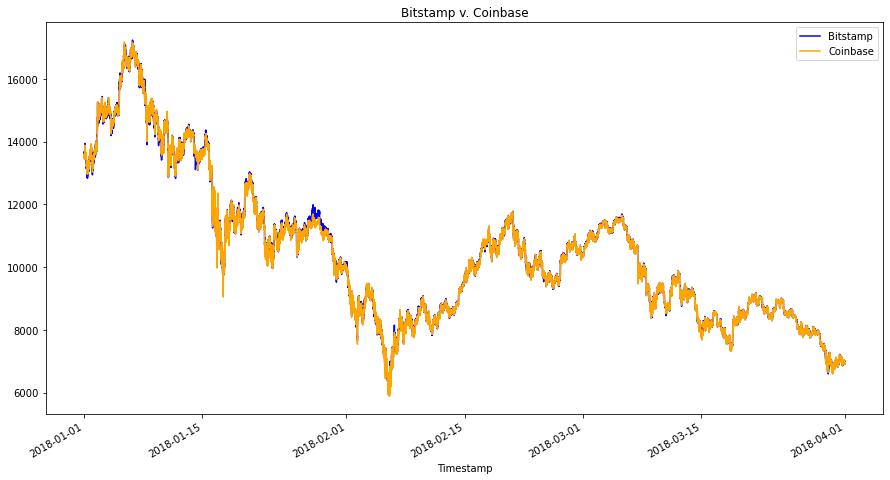

In [130]:
# Overlay the visualizations for the bitstamp and coinbase DataFrames in one plot
# The plot should visualize the prices over the full lenth of the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label
bitstamp_sliced['Close'].plot(legend=True, figsize=(15, 8), title="Bitstamp v. Coinbase", color="blue", label="Bitstamp")
coinbase_sliced['Close'].plot(legend=True, figsize=(15, 8), color="orange", label="Coinbase")


<AxesSubplot:title={'center':'Exchange Comparison (Earlier Time Period - January)'}, xlabel='Timestamp'>

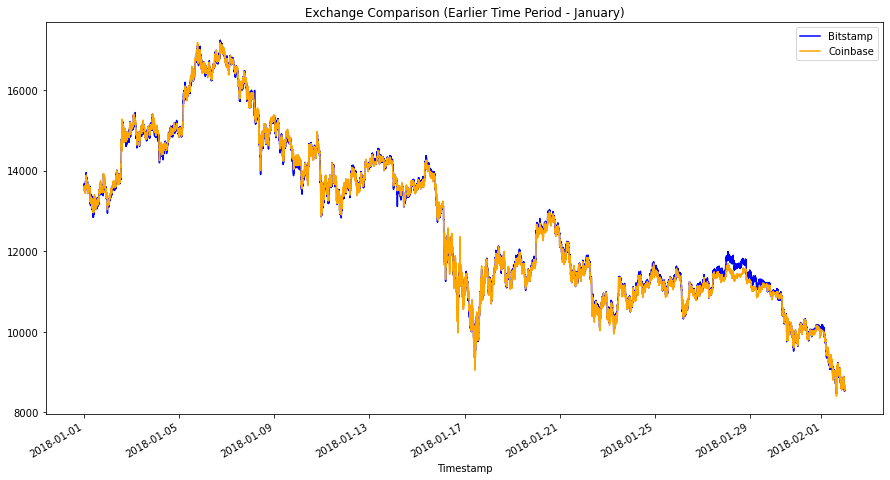

In [131]:
# Using the loc and plot functions, create an overlay plot that visualizes 
# the price action of both DataFrames for a one month period early in the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label

# overlay of early one month period
# selecting Jan 1 -> Feb 1 2018, Exchange Comparison (Earlier Time Period)
# 2018-01-01 -> 2018-02-01

bitstamp_sliced['Close'].loc['2018-01-01':'2018-02-01'].plot(legend=True, figsize=(15, 8), title="Exchange Comparison (Earlier Time Period - January)", color="blue", label="Bitstamp")
coinbase_sliced['Close'].loc['2018-01-01':'2018-02-01'].plot(legend=True, figsize=(15, 8), color="orange", label="Coinbase")

<AxesSubplot:title={'center':'Exchange Comparison (Later Time Period - March)'}, xlabel='Timestamp'>

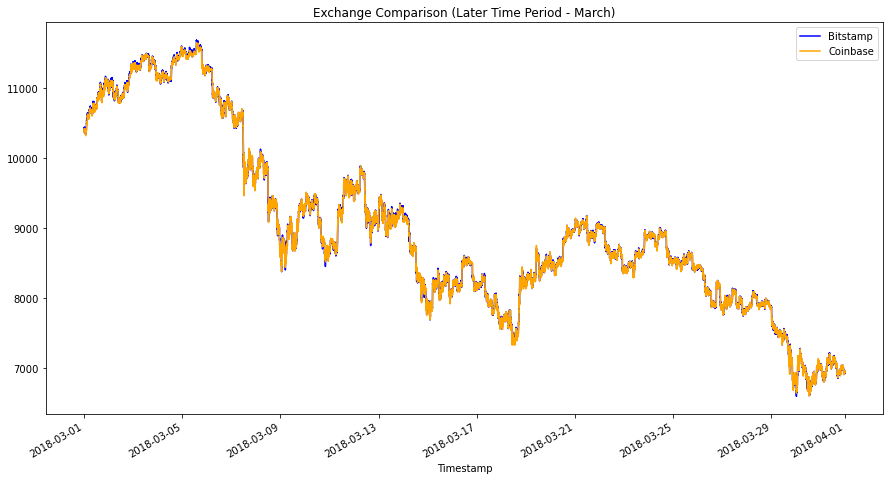

In [132]:
# Using the loc and plot functions, create an overlay plot that visualizes 
# the price action of both DataFrames for a one month period later in the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label

# overlay of later one month period
# selecting March 2018, Exchange Comparison (Later Time Period)
# 2018-03-01 -> 2018-03-31

bitstamp_sliced['Close'].loc['2018-03-01':'2018-03-31'].plot(legend=True, figsize=(15, 8), title="Exchange Comparison (Later Time Period - March)", color="blue", label="Bitstamp")
coinbase_sliced['Close'].loc['2018-03-01':'2018-03-31'].plot(legend=True, figsize=(15, 8), color="orange", label="Coinbase")

**Question** Based on the visualizations of the different time periods, has the degree of spread change as time progressed?

**Answer**
Looking at the two time periods, there looks to be a larger spread earlier in the Jan month, and less in the March month. You can see more of delta between the orange and blue in Jan, and less in March.

### Step 3: Focus Your Analysis on Specific Dates

Focus your analysis on specific dates by completing the following steps:

1. Select three dates to evaluate for arbitrage profitability. Choose one date that’s early in the dataset, one from the middle of the dataset, and one from the later part of the time period.

2. For each of the three dates, generate the summary statistics and then create a box plot. This big-picture view is meant to help you gain a better understanding of the data before you perform your arbitrage calculations. As you compare the data, what conclusions can you draw?

<AxesSubplot:title={'center':'Early Date - Jan 16, 2018'}, xlabel='Timestamp'>

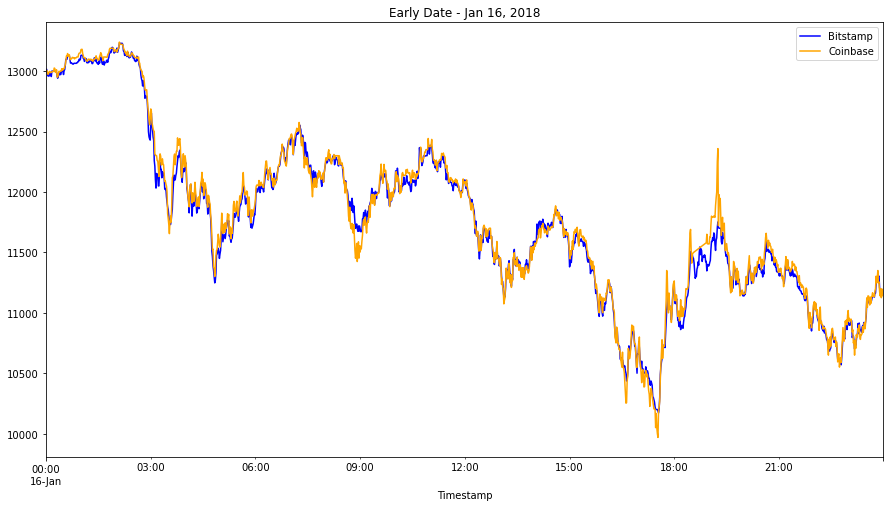

In [170]:
# Create an overlay plot that visualizes the two dataframes over a period of one day early in the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 

## early date: Jan 16, 2018
bitstamp_early_close_df = bitstamp_sliced['Close'].loc['2018-01-16'].copy()
coinbase_early_close_df = coinbase_sliced['Close'].loc['2018-01-16'].copy()

# overlay plot of early date
bitstamp_early_close_df.plot(legend=True, figsize=(15, 8), title="Early Date - Jan 16, 2018", color="blue", label="Bitstamp")
coinbase_early_close_df.plot(legend=True, figsize=(15, 8), color="orange", label="Coinbase")

In [134]:
# Using the early date that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices

arbitrage_spread_early = coinbase_early_close_df - bitstamp_early_close_df

# Generate summary statistics for the early DataFrame
arbitrage_spread_early.describe()

count    1419.000000
mean       23.212135
std        67.789186
min      -275.920000
25%        -8.330000
50%        22.280000
75%        52.355000
max       606.800000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Arbitrage Spread - Early Date'}>

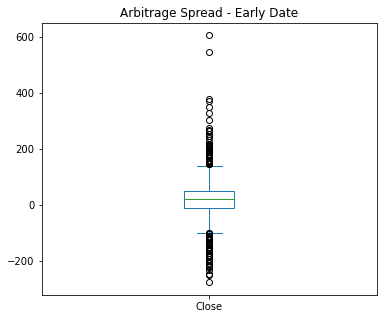

In [135]:
# Visualize the arbitrage spread from early in the dataset in a box plot
# YOUR CODE HERE
arbitrage_spread_early.plot(kind='box', title='Arbitrage Spread - Early Date', figsize=(6,5))

<AxesSubplot:title={'center':'Middle Date - February 24, 2018'}, xlabel='Timestamp'>

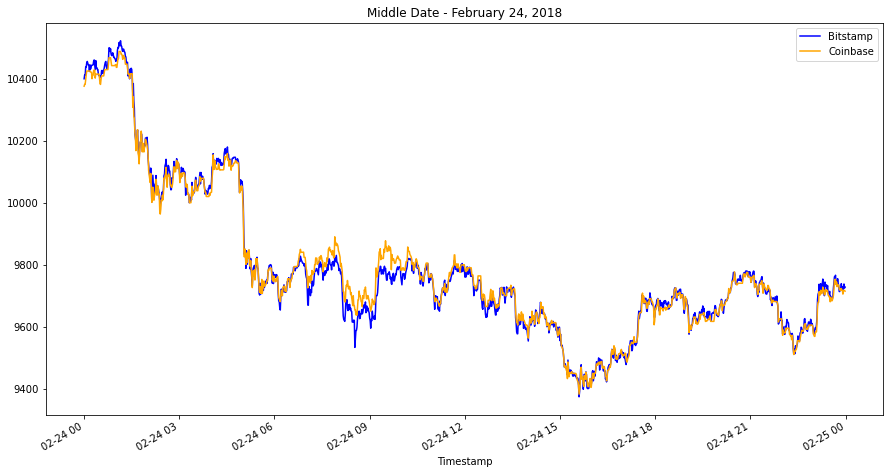

In [169]:
# Create an overlay plot that visualizes the two dataframes over a period of one day from the middle of the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 

## middle date: Feb 24, 2018
bitstamp_mid_close_df = bitstamp_sliced['Close'].loc['2018-02-24'].copy()
coinbase_mid_close_df = coinbase_sliced['Close'].loc['2018-02-24'].copy()

# overlay plot of mid date
bitstamp_mid_close_df.plot(legend=True, figsize=(15, 8), title="Middle Date - February 24, 2018", color="blue", label="Bitstamp")
coinbase_mid_close_df.plot(legend=True, figsize=(15, 8), color="orange", label="Coinbase")


In [137]:
# Using the date in the middle that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_middle = coinbase_mid_close_df - bitstamp_mid_close_df

# Generate summary statistics 
arbitrage_spread_middle.describe()

count    1437.000000
mean        3.396131
std        22.969472
min       -50.180000
25%       -10.590000
50%        -0.010000
75%        12.120000
max       121.320000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Arbitrage Spread - Middle Date Feb 24th 2018'}>

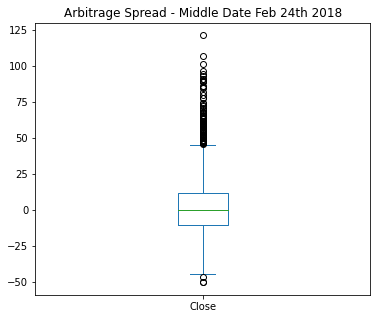

In [138]:
# Visualize the arbitrage spread from the middle of the dataset in a box plot
arbitrage_spread_middle.plot(kind='box', title='Arbitrage Spread - Middle Date Feb 24th 2018', figsize=(6,5))

<AxesSubplot:title={'center':'Late Date - March 26, 2018'}, xlabel='Timestamp'>

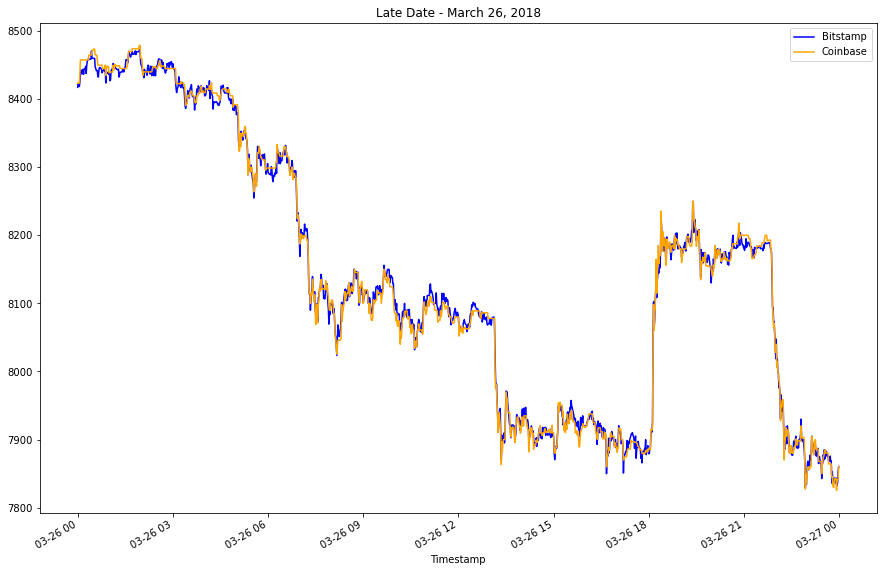

In [139]:
# Create an overlay plot that visualizes the two dataframes over a period of one day from late in the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 

## late date: March 26, 2018
bitstamp_late_close_df = bitstamp_sliced['Close'].loc['2018-03-26'].copy()
coinbase_late_close_df = coinbase_sliced['Close'].loc['2018-03-26'].copy()

# overlay plot of late date
bitstamp_late_close_df.plot(legend=True, figsize=(15, 10), title="Late Date - March 26, 2018", color="blue", label="Bitstamp")
coinbase_late_close_df.plot(legend=True, figsize=(15, 10), color="orange", label="Coinbase")


In [140]:
# Using the date from the late that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_late = coinbase_late_close_df - bitstamp_late_close_df

# Generate summary statistics for the late DataFrame
arbitrage_spread_late.describe()


count    1432.000000
mean       -0.722193
std         8.523060
min       -32.040000
25%        -6.812500
50%        -0.730000
75%         4.965000
max        35.070000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Arbitrage Spread - Late Date Mar 26 2018'}>

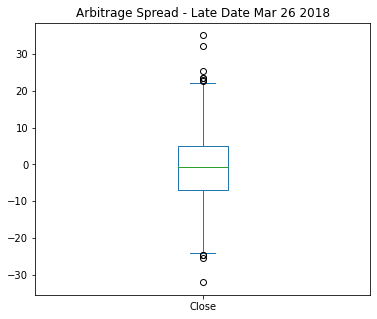

In [141]:
# Visualize the arbitrage spread from late in the dataset in a box plot
arbitrage_spread_late.plot(kind='box', title='Arbitrage Spread - Late Date Mar 26 2018', figsize=(6,5))

### Step 4: Calculate the Arbitrage Profits

Calculate the potential profits for each date that you selected in the previous section. Your goal is to determine whether arbitrage opportunities still exist in the Bitcoin market. Complete the following steps:

1. For each of the three dates, measure the arbitrage spread between the two exchanges by subtracting the lower-priced exchange from the higher-priced one. Then use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame, where the spread is greater than zero.

2. For each of the three dates, calculate the spread returns. To do so, divide the instances that have a positive arbitrage spread (that is, a spread greater than zero) by the price of Bitcoin from the exchange you’re buying on (that is, the lower-priced exchange). Review the resulting DataFrame.

3. For each of the three dates, narrow down your trading opportunities even further. To do so, determine the number of times your trades with positive returns exceed the 1% minimum threshold that you need to cover your costs.

4. Generate the summary statistics of your spread returns that are greater than 1%. How do the average returns compare among the three dates?

5. For each of the three dates, calculate the potential profit, in dollars, per trade. To do so, multiply the spread returns that were greater than 1% by the cost of what was purchased. Make sure to drop any missing values from the resulting DataFrame.

6. Generate the summary statistics, and plot the results for each of the three DataFrames.

7. Calculate the potential arbitrage profits that you can make on each day. To do so, sum the elements in the profit_per_trade DataFrame.

8. Using the `cumsum` function, plot the cumulative sum of each of the three DataFrames. Can you identify any patterns or trends in the profits across the three time periods?

(NOTE: The starter code displays only one date. You'll want to do this analysis for two additional dates).

#### 1. For each of the three dates, measure the arbitrage spread between the two exchanges by subtracting the lower-priced exchange from the higher-priced one. Then use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame, where the spread is greater than zero.

*NOTE*: For illustration, only one of the three dates is shown in the starter code below.

In [142]:
# EARLY
# For the date early in the dataset, measure the arbitrage spread between the two exchanges
# by subtracting the lower-priced exchange from the higher-priced one
arbitrage_spread_early = coinbase_early_close_df - bitstamp_early_close_df

# Use a conditional statement to generate the summary statistics for each arbitrage_spread
# DataFrame, where the spread is greater than zero
positive_arbitrage_spread_early = arbitrage_spread_early[arbitrage_spread_early > 0]
positive_arbitrage_spread_early.describe()


count    960.000000
mean      53.405344
std       53.910409
min        0.010000
25%       21.602500
50%       39.885000
75%       68.547500
max      606.800000
Name: Close, dtype: float64

In [151]:
# MID
# For the date mid in the dataset, measure the arbitrage spread between the two exchanges
# by subtracting the lower-priced exchange from the higher-priced one
arbitrage_spread_middle = coinbase_mid_close_df - bitstamp_mid_close_df

# Use a conditional statement to generate the summary statistics for each arbitrage_spread
# DataFrame, where the spread is greater than zero
positive_arbitrage_spread_middle = arbitrage_spread_middle[arbitrage_spread_middle > 0]
positive_arbitrage_spread_middle.describe()


count    713.000000
mean      19.880351
std       20.699851
min        0.010000
25%        5.040000
50%       12.330000
75%       27.250000
max      121.320000
Name: Close, dtype: float64

In [152]:
# LATE
# For the date late in the dataset, measure the arbitrage spread between the two exchanges
# by subtracting the lower-priced exchange from the higher-priced one
arbitrage_spread_late = coinbase_late_close_df - bitstamp_late_close_df

# Use a conditional statement to generate the summary statistics for each arbitrage_spread
# DataFrame, where the spread is greater than zero
positive_arbitrage_spread_late = arbitrage_spread_late[arbitrage_spread_late > 0]
positive_arbitrage_spread_late.describe()

count    651.000000
mean       6.689247
std        5.240159
min        0.010000
25%        2.835000
50%        5.230000
75%        9.195000
max       35.070000
Name: Close, dtype: float64

#### 2. For each of the three dates, calculate the spread returns. To do so, divide the instances that have a positive arbitrage spread (that is, a spread greater than zero) by the price of Bitcoin from the exchange you’re buying on (that is, the lower-priced exchange). Review the resulting DataFrame.

In [153]:
# EARLY SPREAD RETURN
# For the date early in the dataset, calculate the spread returns by dividing the instances when the arbitrage spread is positive (> 0) 
# by the price of Bitcoin from the exchange you are buying on (the lower-priced exchange).
spread_return_early= positive_arbitrage_spread_early / bitstamp_early_close_df

# Review the spread return DataFrame
spread_return_early.head()


Timestamp
2018-01-16 00:00:00         NaN
2018-01-16 00:01:00         NaN
2018-01-16 00:02:00    0.000731
2018-01-16 00:03:00    0.001108
2018-01-16 00:04:00    0.000909
Name: Close, dtype: float64

In [171]:
# MID SPREAD RETURN
# For the date mid in the dataset, calculate the spread returns by dividing the instances when the arbitrage spread is positive (> 0) 
# by the price of Bitcoin from the exchange you are buying on (the lower-priced exchange).
spread_return_mid = positive_arbitrage_spread_middle / bitstamp_mid_close_df

# Review the spread return DataFrame
spread_return_mid.head(10)


Timestamp
2018-02-24 00:00:00   NaN
2018-02-24 00:01:00   NaN
2018-02-24 00:02:00   NaN
2018-02-24 00:03:00   NaN
2018-02-24 00:04:00   NaN
2018-02-24 00:05:00   NaN
2018-02-24 00:06:00   NaN
2018-02-24 00:07:00   NaN
2018-02-24 00:08:00   NaN
2018-02-24 00:09:00   NaN
Name: Close, dtype: float64

In [172]:
# LATE SPREAD RETURN

# For the date late in the dataset, calculate the spread returns by dividing the instances when the arbitrage spread is positive (> 0) 
# by the price of Bitcoin from the exchange you are buying on (the lower-priced exchange).
spread_return_late = positive_arbitrage_spread_late / bitstamp_late_close_df

# Review the spread return DataFrame
spread_return_late.head(10)

Timestamp
2018-03-26 00:00:00    0.000738
2018-03-26 00:01:00    0.000122
2018-03-26 00:02:00    0.000470
2018-03-26 00:03:00    0.000576
2018-03-26 00:04:00    0.001395
2018-03-26 00:05:00    0.002551
2018-03-26 00:06:00    0.001742
2018-03-26 00:07:00    0.001861
2018-03-26 00:08:00    0.002449
2018-03-26 00:09:00    0.002117
Name: Close, dtype: float64

#### 3. For each of the three dates, narrow down your trading opportunities even further. To do so, determine the number of times your trades with positive returns exceed the 1% minimum threshold that you need to cover your costs.

In [174]:
# EARLY PROFITABLE (exceed 1% threshold)

# For the date early in the dataset, determine the number of times your trades with positive returns 
# exceed the 1% minimum threshold (.01) that you need to cover your costs
profitable_trades_early = spread_return_early[spread_return_early > .01 ]

# Review the first five profitable trades
profitable_trades_early.head()


Timestamp
2018-01-16 02:56:00    0.012962
2018-01-16 02:57:00    0.010838
2018-01-16 02:59:00    0.014171
2018-01-16 03:00:00    0.010675
2018-01-16 03:06:00    0.019704
Name: Close, dtype: float64

In [175]:
# MID PROFITABLE (exceed 1% threshold)

# For the date mid in the dataset, determine the number of times your trades with positive returns 
# exceed the 1% minimum threshold (.01) that you need to cover your costs
profitable_trades_mid = spread_return_mid[spread_return_mid > .01 ]

# Review the first five profitable trades
profitable_trades_mid.head()


Timestamp
2018-02-24 08:32:00    0.012726
2018-02-24 09:32:00    0.010974
2018-02-24 09:39:00    0.010431
Name: Close, dtype: float64

In [176]:
# LATE PROFITABLE (exceed 1% threshold)

# For the date late in the dataset, determine the number of times your trades with positive returns 
# exceed the 1% minimum threshold (.01) that you need to cover your costs
profitable_trades_late = spread_return_late[spread_return_late > .01 ]

# Review the first five profitable trades
profitable_trades_late.head()


Series([], Name: Close, dtype: float64)

#### 4. Generate the summary statistics of your spread returns that are greater than 1%. How do the average returns compare among the three dates?

In [177]:
# EARLY profit summary

# For the date early in the dataset, generate the summary statistics for the profitable trades
# or you trades where the spread returns are are greater than 1%
profitable_trades_early.describe()

count    73.000000
mean      0.016720
std       0.007628
min       0.010109
25%       0.012061
50%       0.014794
75%       0.018124
max       0.051633
Name: Close, dtype: float64

In [178]:
# MID profit summary

# For the date mid in the dataset, generate the summary statistics for the profitable trades
# or you trades where the spread returns are are greater than 1%
profitable_trades_mid.describe()

count    3.000000
mean     0.011377
std      0.001199
min      0.010431
25%      0.010703
50%      0.010974
75%      0.011850
max      0.012726
Name: Close, dtype: float64

In [179]:
# LATE profit summary

# For the date late in the dataset, generate the summary statistics for the profitable trades
# or you trades where the spread returns are are greater than 1%
profitable_trades_late.describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Close, dtype: float64

#### 5. For each of the three dates, calculate the potential profit, in dollars, per trade. To do so, multiply the spread returns that were greater than 1% by the cost of what was purchased. Make sure to drop any missing values from the resulting DataFrame.

In [196]:
# EARLY profit per trade, dropping missing values

# For the date MID in the dataset, calculate the potential profit per trade in dollars 
# Multiply the profitable trades by the cost of the Bitcoin that was purchased
profit_early = profitable_trades_early * bitstamp_early_close_df

# Drop any missing values from the profit DataFrame
profit_per_trade_early = profit_early.dropna()

# View the early profit DataFrame
profit_per_trade_early

Timestamp
2018-01-16 02:56:00    162.01
2018-01-16 02:57:00    135.00
2018-01-16 02:59:00    176.13
2018-01-16 03:00:00    134.01
2018-01-16 03:06:00    241.54
                        ...  
2018-01-16 19:23:00    125.09
2018-01-16 19:26:00    131.78
2018-01-16 19:38:00    124.01
2018-01-16 19:48:00    117.63
2018-01-16 20:07:00    113.69
Name: Close, Length: 73, dtype: float64

In [197]:
# MID profit per trade, dropping missing values

# For the date MID in the dataset, calculate the potential profit per trade in dollars 
# Multiply the profitable trades by the cost of the Bitcoin that was purchased
profit_mid = profitable_trades_mid * bitstamp_mid_close_df

# Drop any missing values from the profit DataFrame
profit_per_trade_mid = profit_mid.dropna()

# View the MID profit DataFrame
profit_per_trade_mid

Timestamp
2018-02-24 08:32:00    121.32
2018-02-24 09:32:00    107.00
2018-02-24 09:39:00    101.75
Name: Close, dtype: float64

In [198]:
# LATE profit per trade, dropping missing values

# For the date LATE in the dataset, calculate the potential profit per trade in dollars 
# Multiply the profitable trades by the cost of the Bitcoin that was purchased
profit_late = profitable_trades_late * bitstamp_late_close_df

# Drop any missing values from the profit DataFrame
profit_per_trade_late = profit_late.dropna()

# View the late profit DataFrame
profit_per_trade_late

Series([], Name: Close, dtype: float64)

#### 6. Generate the summary statistics, and plot the results for each of the three DataFrames.

In [199]:
# EARLY profit per trade summary stats
# Generate the summary statistics for the early profit per trade DataFrame
profit_per_trade_early.describe()

count     73.000000
mean     193.796849
std       88.701429
min      112.520000
25%      139.420000
50%      171.310000
75%      210.060000
max      606.800000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Profit Per Trade - Early Date'}, xlabel='Timestamp'>

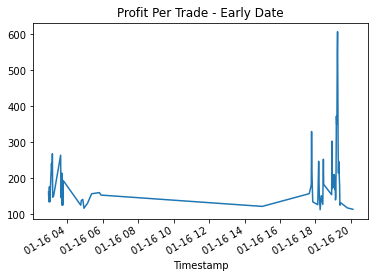

In [191]:
# EARLY profit_per_trade plot
# Plot the results for the early profit per trade DataFrame
profit_per_trade_early.plot(title='Profit Per Trade - Early Date')

In [200]:
# MID profit per trade summary stats
# Generate the summary statistics for the MID profit per trade DataFrame
profit_per_trade_mid.describe()

count      3.000000
mean     110.023333
std       10.129246
min      101.750000
25%      104.375000
50%      107.000000
75%      114.160000
max      121.320000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Profit Per Trade - MID Date'}, xlabel='Timestamp'>

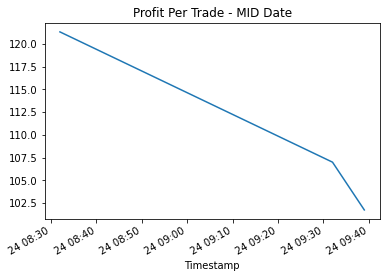

In [201]:
# MID profit_per_trade plot
# Plot the results for the MID profit per trade DataFrame
profit_per_trade_mid.plot(title='Profit Per Trade - MID Date')

In [202]:
# LATE profit per trade summary stats
# Generate the summary statistics for the LATE profit per trade DataFrame
profit_per_trade_late.describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Profit Per Trade - LATE Date'}, xlabel='Timestamp'>

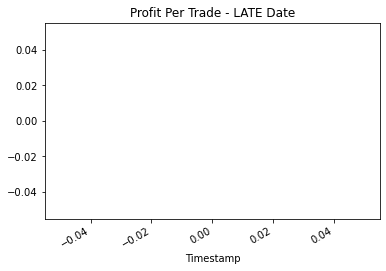

In [203]:
# LATE profit_per_trade plot
# Plot the results for the LATE profit per trade DataFrame
profit_per_trade_late.plot(title='Profit Per Trade - LATE Date')

#### 7. Calculate the potential arbitrage profits that you can make on each day. To do so, sum the elements in the profit_per_trade DataFrame.

In [207]:
# EARLY SUM PROFIT PER TRADE

# Calculate the sum of the potential profits for the early profit per trade DataFrame
profit_per_trade_early.sum()

14147.169999999998

In [208]:
# MID SUM PROFIT PER TRADE

# Calculate the sum of the potential profits for the MID profit per trade DataFrame
profit_per_trade_mid.sum()

330.0699999999997

In [209]:
# LATE SUM PROFIT PER TRADE

# Calculate the sum of the potential profits for the LATE profit per trade DataFrame
profit_per_trade_late.sum()

0.0

#### 8. Using the `cumsum` function, plot the cumulative sum of each of the three DataFrames. Can you identify any patterns or trends in the profits across the three time periods?

In [222]:
# EARLY PROFIT CUMULATIVE SUM

# Use the cumsum function to calculate the cumulative profits over time for the early profit per trade DataFrame
cumulative_profit_early = profit_per_trade_early.cumsum()
cumulative_profit_early.tail()

Timestamp
2018-01-16 19:23:00    13660.06
2018-01-16 19:26:00    13791.84
2018-01-16 19:38:00    13915.85
2018-01-16 19:48:00    14033.48
2018-01-16 20:07:00    14147.17
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Cumulative Sum - Early Date'}, xlabel='Timestamp'>

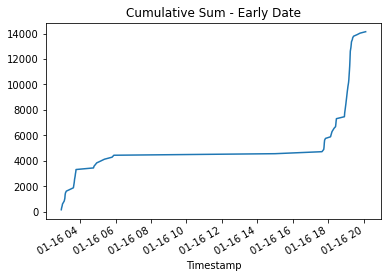

In [223]:
# EARLY PLOT PROFIT CUMULATIVE SUM

# Plot the cumulative sum of profits for the early profit per trade DataFrame
cumulative_profit_early.plot(figsize=(6,4), title='Cumulative Sum - Early Date')

In [224]:
# MID PROFIT CUMULATIVE SUM

# Use the cumsum function to calculate the cumulative profits over time for the MID profit per trade DataFrame
cumulative_profit_mid = profit_per_trade_mid.cumsum()
cumulative_profit_mid.tail()

Timestamp
2018-02-24 08:32:00    121.32
2018-02-24 09:32:00    228.32
2018-02-24 09:39:00    330.07
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Cumulative Sum - Middle Date'}, xlabel='Timestamp'>

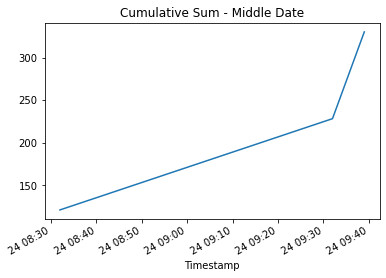

In [219]:
# MID PLOT PROFIT CUMULATIVE SUM

# Plot the cumulative sum of profits for the MID profit per trade DataFrame
cumulative_profit_mid.plot(figsize=(6,4), title='Cumulative Sum - Middle Date')

In [225]:
# LATE PROFIT CUMULATIVE SUM

# Use the cumsum function to calculate the cumulative profits over time for the LATE profit per trade DataFrame
cumulative_profit_late = profit_per_trade_late.cumsum()
cumulative_profit_late.tail()

Series([], Name: Close, dtype: float64)

<AxesSubplot:title={'center':'Cumulative Sum - Late Date'}, xlabel='Timestamp'>

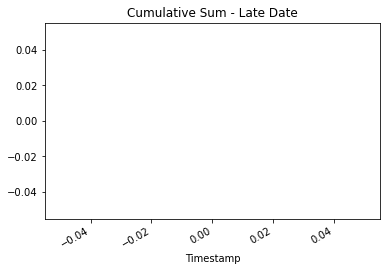

In [226]:
# LATE PLOT PROFIT CUMULATIVE SUM

# Plot the cumulative sum of profits for the LATE profit per trade DataFrame
cumulative_profit_late.plot(figsize=(6,4), title='Cumulative Sum - Late Date')

**Question:** After reviewing the profit information across each date from the different time periods, can you identify any patterns or trends?
<br>  
**Answer:**
<br>
Comparing early, mid and late date periods reveals a couple of patterns and trends.<br>

|Period   	|Cumulative Profit   	|
|---	|---	|
|Early   	|14147.17   	|
|Middle   	|330.07   	|
|Late   	|0    	|

<br>

1. Overall, the profits to be made each period decreased significantly from early to late (see table above)
2.  Each early/middle/late period had a different profit profile:
    1. Early - profit early in the period, then flat, then a big uptick in profit at the tail
    2. Middle - steady profit for the first 3/4 of the day, then a bit uptick at the tail
    3. Late - no profit to be made this day as coinbase rarely had higher prices, and the spread was too small to be profitable



# Final Analysis Report

## Assumptions

## Discoveries

## Summary Tables
